# 【問題1】仮定関数

# 【問題2】最急降下法

# 【問題3】推定

# 【問題5】目的関数

In [1]:
import numpy as np

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """    
    
    def __init__(self, num_iter, lr, bias=False, verbose=False):
        
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr 
        self.bias = bias
        self.verbose = verbose
        
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = None
        self.val_theta = None
        
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
             訓練データ
             
        Returns
        -------
        hx : 次の形のndarray, shape (n_samples, 1)
              線形の仮定関数による推定結果
                
        """
        
        import numpy as np
        
        hx = np.dot(X, self.theta.T)
        return hx
    
    
    
    def _gradient_descent(self, X, y):
        """
        現在の誤差を算出

        Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                 訓練データ
                 
            y : 次の形のndarray, shape (n_samples)
                 訓練データの正解ラベル

        """
        m = len(y)
        
        # 誤差算出
        hx = self._linear_hypothesis(X)
        error = hx - y
        
        # 勾配算出
        grad = np.dot(X.T, error) / y.shape[0]
         
        # thetaを更新
        self.theta -= self.lr*grad
        

    def _gradient_descent_val(self, X, y):
        """
        現在の誤差を算出

        Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                 訓練データ
            y : 次の形のndarray, shape (n_samples, )
                 訓練データの正解値
        """
        # 初期値
        m = len(y)
        
        # 誤差算出
        #hx = self._linear_hypothesis(X)
        hx_val = np.dot(X, self.val_theta.T)
        error = hx_val - y
        
        # 勾配算出
        grad_val = np.dot(X.T, error) / y.shape[0]
         
        # thetaを更新
        self.val_theta -= self.lr*grad_val
    
    
    def _cost_func(self, X, y):
        
        # 初期値を設定
        m = len(y)
        J = 0
        
        # コストを計算
        hx = self._linear_hypothesis(X)
        error = hx - y
        J = (1 / 2*m) * error**2
        J = np.mean(J)
        
        return J
                
        
    def _cost_func_val(self, X_val, y_val):
        
        m = len(y_val)
        J = 0
        
        hx_val = np.dot(X_val, self.val_theta.T)        
        error_val = hx_val - y_val
        J = (1 / 2*m) * error_val**2                
        J = np.mean(J)
        
        return J

    
    # フラグを見てバイアスを加える
    def _add_bias(self, X):
        
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        else:
            pass
        
        return X
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
            線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

            Parameters
            ----------
            X : 次の形のndarray, shape (n_samples, n_features)
                 訓練データの特徴量
            y : 次の形のndarray, shape (n_samples, )
                 訓練データの正解値
            X_val : 次の形のndarray, shape (n_samples, n_features)
                検証データの特徴量
            y_val : 次の形のndarray, shape (n_samples, )
                検証データの正解値

        """
        # bias がTrue ならバイアス項を加える
        X = self._add_bias(X)
        
        # theta の初期値を生成する
        self.theta = np.random.rand(X.shape[1] ) 
        
        # 最急降下法によるthetaの更新と、コスト関数による評価を、iter回数分実行する
        for i in range(self.iter):
            
                # i番目のtheta更新
                self._gradient_descent(X, y)
                
                # i番目のコスト算出
                j = self._cost_func(X, y)
                
                # 描画用にコストを配列リストに
                self.loss[i] = j
                
                # verboseがTrueならイテレーション分の処理が見える
                if self.verbose:
                    print(f"theta[{i}]: {self.theta}")
                    print(f"J[{i}]:{j}")
                    print("--------------end of train {}----------------".format(i+1))
                else:
                    pass
        
        
        # 検証データが入力された場合、同様の処理を検証データに対しても行う
        if X_val is not None and y_val is not None:
            
            X_val = self._add_bias(X_val)
            self.val_theta = np.random.rand(X_val.shape[1] )
            
            for i in range(self.iter):
            
                # i番目のtheta更新
                self._gradient_descent_val(X_val, y_val)
                
                # i番目のコスト算出
                j_val = self._cost_func_val(X_val, y_val)
                
                # 描画用にコストを配列リストに
                self.val_loss[i] = j_val
                
                # verboseがTrueならイテレーション分の処理が見える
                if self.verbose:
                    print(f"theta[{i}]: {self.val_theta}")
                    print(f"J[{i}]:{j_val}")
                    print("--------------end of val {}----------------".format(i+1))
                else:
                    pass
        else:
            pass
        

    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
             サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """        
        y_pred_proba = self._linear_hypothesis(X)
        
        return y_pred_proba

# 【問題4】平均二乗誤差

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """    
    mse = np.average((y_pred - y)**2)
        
    return mse

# 【問題6】学習と推定

In [4]:
import pandas as pd

df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
X = df.loc[:, ["GrLivArea", "YearBuilt"]].values
y = df.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [6]:
slr = ScratchLinearRegression(lr=1e-8, num_iter=1000, bias=True, verbose=True)

In [7]:
slr.fit(X_train, y_train, X_val, y_val)

theta[0]: [0.91691662 3.82108335 4.11326255]
J[0]:18776220743273.824
--------------end of train 1----------------
theta[1]: [0.91860053 6.66050619 7.44522148]
J[1]:16743971323468.059
--------------end of train 2----------------
theta[2]: [ 0.9201755   9.32598545 10.5623098 ]
J[2]:14960203869528.854
--------------end of train 3----------------
theta[3]: [ 0.92164844 11.82850014 13.47810861]
J[3]:13394516701428.338
--------------end of train 4----------------
theta[4]: [ 0.92302578 14.17833571 16.20534108]
J[4]:12020227841678.64
--------------end of train 5----------------
theta[5]: [ 0.92431356 16.38512791 18.75592663]
J[5]:10813919902522.875
--------------end of train 6----------------
theta[6]: [ 0.92551746 18.45790377 21.14103168]
J[6]:9755040657060.45
--------------end of train 7----------------
theta[7]: [ 0.92664277 20.40512012 23.37111728]
J[7]:8825552481269.355
--------------end of train 8----------------
theta[8]: [ 0.92769446 22.23469954 25.45598359]
J[8]:8009624687476.503
---

theta[107]: [ 0.94010474 55.97369115 50.95143083]
J[107]:2051262434007.1375
--------------end of train 108----------------
theta[108]: [ 0.94007104 56.04981765 50.89511559]
J[108]:2050281476318.1372
--------------end of train 109----------------
theta[109]: [ 0.94003729 56.12565767 50.83870198]
J[109]:2049304061885.3677
--------------end of train 110----------------
theta[110]: [ 0.94000349 56.2012216  50.78220244]
J[110]:2048330153197.3716
--------------end of train 111----------------
theta[111]: [ 0.93996966 56.2765192  50.72562861]
J[111]:2047359715985.8997
--------------end of train 112----------------
theta[112]: [ 0.93993579 56.35155963 50.66899137]
J[112]:2046392718833.673
--------------end of train 113----------------
theta[113]: [ 0.9399019  56.42635148 50.61230092]
J[113]:2045429132830.1272
--------------end of train 114----------------
theta[114]: [ 0.93986799 56.50090281 50.5555668 ]
J[114]:2044468931269.255
--------------end of train 115----------------
theta[115]: [ 0.93

theta[190]: [ 0.93736923 61.71343255 46.39390607]
J[190]:1980330165999.9421
--------------end of train 191----------------
theta[191]: [ 0.93733797 61.77731977 46.3422847 ]
J[191]:1979592069807.9763
--------------end of train 192----------------
theta[192]: [ 0.93730675 61.8410976  46.2907503 ]
J[192]:1978856483051.0283
--------------end of train 193----------------
theta[193]: [ 0.93727559 61.90476626 46.23930277]
J[193]:1978123397196.8435
--------------end of train 194----------------
theta[194]: [ 0.93724446 61.96832598 46.18794201]
J[194]:1977392803742.2373
--------------end of train 195----------------
theta[195]: [ 0.93721338 62.031777   46.13666793]
J[195]:1976664694212.9875
--------------end of train 196----------------
theta[196]: [ 0.93718235 62.09511952 46.08548042]
J[196]:1975939060163.732
--------------end of train 197----------------
theta[197]: [ 0.93715136 62.15835377 46.03437938]
J[197]:1975215893177.8625
--------------end of train 198----------------
theta[198]: [ 0.9

theta[285]: [ 0.93459109 67.32119755 41.86111787]
J[285]:1920321628404.0134
--------------end of train 286----------------
theta[286]: [ 0.9345638  67.3755328  41.81719487]
J[286]:1919787553456.5955
--------------end of train 287----------------
theta[287]: [ 0.93453655 67.4297756  41.77334661]
J[287]:1919255294294.4268
--------------end of train 288----------------
theta[288]: [ 0.93450934 67.48392612 41.72957294]
J[288]:1918724844744.075
--------------end of train 289----------------
theta[289]: [ 0.93448217 67.5379845  41.68587375]
J[289]:1918196198653.0955
--------------end of train 290----------------
theta[290]: [ 0.93445503 67.5919509  41.64224891]
J[290]:1917669349889.961
--------------end of train 291----------------
theta[291]: [ 0.93442793 67.64582549 41.59869828]
J[291]:1917144292343.9907
--------------end of train 292----------------
theta[292]: [ 0.93440087 67.69960842 41.55522175]
J[292]:1916621019925.28
--------------end of train 293----------------
theta[293]: [ 0.9343

theta[384]: [ 0.93206641 72.27562886 37.85609978]
J[384]:1875362452195.1934
--------------end of train 385----------------
theta[385]: [ 0.93204263 72.3215347  37.81899083]
J[385]:1874981232590.1562
--------------end of train 386----------------
theta[386]: [ 0.93201889 72.36736244 37.78194501]
J[386]:1874601309082.1143
--------------end of train 387----------------
theta[387]: [ 0.93199518 72.41311222 37.74496222]
J[387]:1874222677264.5063
--------------end of train 388----------------
theta[388]: [ 0.9319715  72.45878415 37.70804235]
J[388]:1873845332745.754
--------------end of train 389----------------
theta[389]: [ 0.93194785 72.50437838 37.6711853 ]
J[389]:1873469271149.2075
--------------end of train 390----------------
theta[390]: [ 0.93192423 72.54989503 37.63439095]
J[390]:1873094488113.0999
--------------end of train 391----------------
theta[391]: [ 0.93190065 72.59533424 37.59765921]
J[391]:1872720979290.491
--------------end of train 392----------------
theta[392]: [ 0.93

theta[478]: [ 0.92996646 76.26653177 34.62996945]
J[478]:1844645402306.2576
--------------end of train 479----------------
theta[479]: [ 0.92994551 76.30564756 34.59834937]
J[479]:1844368616669.1912
--------------end of train 480----------------
theta[480]: [ 0.92992459 76.3446968  34.5667831 ]
J[480]:1844092772067.2307
--------------end of train 481----------------
theta[481]: [ 0.9299037  76.38367961 34.53527053]
J[481]:1843817865300.9805
--------------end of train 482----------------
theta[482]: [ 0.92988283 76.42259609 34.50381157]
J[482]:1843543893181.921
--------------end of train 483----------------
theta[483]: [ 0.929862   76.46144636 34.47240614]
J[483]:1843270852532.373
--------------end of train 484----------------
theta[484]: [ 0.92984119 76.50023053 34.44105414]
J[484]:1842998740185.4622
--------------end of train 485----------------
theta[485]: [ 0.92982041 76.53894871 34.40975548]
J[485]:1842727552985.0798
--------------end of train 486----------------
theta[486]: [ 0.92

theta[613]: [ 0.92737141 80.98817528 30.81312963]
J[613]:1814640068971.6123
--------------end of train 614----------------
theta[614]: [ 0.92735381 81.01925775 30.78800346]
J[614]:1814465297558.6028
--------------end of train 615----------------
theta[615]: [ 0.92733623 81.05028734 30.76292004]
J[615]:1814291120345.625
--------------end of train 616----------------
theta[616]: [ 0.92731868 81.08126414 30.73787929]
J[616]:1814117535312.477
--------------end of train 617----------------
theta[617]: [ 0.92730114 81.11218823 30.71288115]
J[617]:1813944540445.8242
--------------end of train 618----------------
theta[618]: [ 0.92728363 81.14305971 30.68792554]
J[618]:1813772133739.1772
--------------end of train 619----------------
theta[619]: [ 0.92726614 81.17387866 30.66301239]
J[619]:1813600313192.869
--------------end of train 620----------------
theta[620]: [ 0.92724867 81.20464518 30.63814163]
J[620]:1813429076814.0305
--------------end of train 621----------------
theta[621]: [ 0.927

J[751]:1795363785296.2495
--------------end of train 752----------------
theta[752]: [ 0.92512077 84.83866566 27.70050482]
J[752]:1795254550735.8896
--------------end of train 753----------------
theta[753]: [ 0.9251059  84.86319698 27.68067442]
J[753]:1795145687558.7996
--------------end of train 754----------------
theta[754]: [ 0.92509104 84.88768656 27.66087775]
J[754]:1795037194502.3237
--------------end of train 755----------------
theta[755]: [ 0.92507621 84.91213447 27.64111477]
J[755]:1794929070308.1006
--------------end of train 756----------------
theta[756]: [ 0.92506139 84.93654079 27.62138541]
J[756]:1794821313722.047
--------------end of train 757----------------
theta[757]: [ 0.92504659 84.96090559 27.60168961]
J[757]:1794713923494.3428
--------------end of train 758----------------
theta[758]: [ 0.9250318  84.98522893 27.58202733]
J[758]:1794606898379.4165
--------------end of train 759----------------
theta[759]: [ 0.92501704 85.00951088 27.5623985 ]
J[759]:1794500237

theta[879]: [ 0.92336196 87.64267919 25.43382163]
J[879]:1784011513580.4421
--------------end of train 880----------------
theta[880]: [ 0.92334907 87.66243981 25.41784772]
J[880]:1783940875264.253
--------------end of train 881----------------
theta[881]: [ 0.92333621 87.68216681 25.40190099]
J[881]:1783870477109.1304
--------------end of train 882----------------
theta[882]: [ 0.92332335 87.70186024 25.38598139]
J[882]:1783800318298.5574
--------------end of train 883----------------
theta[883]: [ 0.92331051 87.72152017 25.37008887]
J[883]:1783730398018.7942
--------------end of train 884----------------
theta[884]: [ 0.92329768 87.74114665 25.3542234 ]
J[884]:1783660715458.8672
--------------end of train 885----------------
theta[885]: [ 0.92328487 87.76073974 25.33838491]
J[885]:1783591269810.5596
--------------end of train 886----------------
theta[886]: [ 0.92327207 87.78029949 25.32257338]
J[886]:1783522060268.403
--------------end of train 887----------------
theta[887]: [ 0.92

theta[20]: [ 0.24601699 36.27135952 41.1400056 ]
J[20]:1156409051471.9863
--------------end of val 21----------------
theta[21]: [ 0.24643189 37.11787085 41.96919045]
J[21]:1106726430404.3123
--------------end of val 22----------------
theta[22]: [ 0.24681781 37.91885697 42.74122853]
J[22]:1062932537127.8274
--------------end of val 23----------------
theta[23]: [ 0.24717655 38.67713609 43.45968076]
J[23]:1024318408159.8771
--------------end of val 24----------------
theta[24]: [ 0.24750981 39.39535127 44.12788669]
J[24]:990260470264.1699
--------------end of val 25----------------
theta[25]: [ 0.24781918 40.07598134 44.74897831]
J[25]:960210255611.4973
--------------end of val 26----------------
theta[26]: [ 0.24810615 40.72135104 45.3258929 ]
J[26]:933685355699.6237
--------------end of val 27----------------
theta[27]: [ 0.24837211 41.33364068 45.8613852 ]
J[27]:910261464829.786
--------------end of val 28----------------
theta[28]: [ 0.24861837 41.91489503 46.35803869]
J[28]:889565

theta[142]: [ 0.24765089 60.98516942 45.69233448]
J[142]:668470888436.9957
--------------end of val 143----------------
theta[143]: [ 0.24760701 61.08172205 45.61652957]
J[143]:667921318419.5149
--------------end of val 144----------------
theta[144]: [ 0.24756318 61.17810233 45.54082397]
J[144]:667373509909.7579
--------------end of val 145----------------
theta[145]: [ 0.2475194  61.2743116  45.46521888]
J[145]:666827457155.1758
--------------end of val 146----------------
theta[146]: [ 0.24747568 61.37035117 45.38971545]
J[146]:666283154434.8243
--------------end of val 147----------------
theta[147]: [ 0.24743201 61.46622228 45.31431472]
J[147]:665740596057.6758
--------------end of val 148----------------
theta[148]: [ 0.2473884  61.5619261  45.23901768]
J[148]:665199776361.1267
--------------end of val 149----------------
theta[149]: [ 0.24734484 61.65746374 45.16382521]
J[149]:664660689709.6802
--------------end of val 150----------------
theta[150]: [ 0.24730133 61.75283625 45.

theta[273]: [ 0.24238589 72.37230281 36.69133987]
J[273]:609599915659.1239
--------------end of val 274----------------
theta[274]: [ 0.24234933 72.45031807 36.62960683]
J[274]:609238951907.2866
--------------end of val 275----------------
theta[275]: [ 0.24231281 72.52820827 36.56797274]
J[275]:608879144536.9417
--------------end of val 276----------------
theta[276]: [ 0.24227635 72.60597359 36.50643746]
J[276]:608520489843.5114
--------------end of val 277----------------
theta[277]: [ 0.24223993 72.68361425 36.44500081]
J[277]:608162984134.2863
--------------end of val 278----------------
theta[278]: [ 0.24220357 72.76113044 36.38366265]
J[278]:607806623728.387
--------------end of val 279----------------
theta[279]: [ 0.24216726 72.83852236 36.32242282]
J[279]:607451404956.7258
--------------end of val 280----------------
theta[280]: [ 0.242131   72.91579021 36.26128116]
J[280]:607097324161.97
--------------end of val 281----------------
theta[281]: [ 0.24209479 72.9929342  36.200

theta[432]: [ 0.23716645 83.32972834 28.02077346]
J[432]:564573112981.887
--------------end of val 433----------------
theta[433]: [ 0.2371371  83.39017789 27.97293997]
J[433]:564356396847.6249
--------------end of val 434----------------
theta[434]: [ 0.23710779 83.45053053 27.92518316]
J[434]:564140374983.9789
--------------end of val 435----------------
theta[435]: [ 0.23707853 83.51078642 27.87750291]
J[435]:563925045166.7874
--------------end of val 436----------------
theta[436]: [ 0.2370493  83.57094571 27.82989909]
J[436]:563710405179.014
--------------end of val 437----------------
theta[437]: [ 0.23702011 83.63100856 27.78237158]
J[437]:563496452810.7252
--------------end of val 438----------------
theta[438]: [ 0.23699096 83.69097513 27.73492027]
J[438]:563283185859.0669
--------------end of val 439----------------
theta[439]: [ 0.23696185 83.75084557 27.68754503]
J[439]:563070602128.2423
--------------end of val 440----------------
theta[440]: [ 0.23693278 83.81062003 27.64

theta[553]: [ 0.23388695 89.98328702 22.7558382 ]
J[553]:542806612961.47845
--------------end of val 554----------------
theta[554]: [ 0.23386199 90.03307037 22.71644483]
J[554]:542659627866.94116
--------------end of val 555----------------
theta[555]: [ 0.23383706 90.0827739  22.67711461]
J[555]:542513113653.0438
--------------end of val 556----------------
theta[556]: [ 0.23381216 90.13239776 22.63784745]
J[556]:542367068811.2755
--------------end of val 557----------------
theta[557]: [ 0.23378729 90.18194207 22.59864323]
J[557]:542221491837.9586
--------------end of val 558----------------
theta[558]: [ 0.23376246 90.23140695 22.55950186]
J[558]:542076381234.2321
--------------end of val 559----------------
theta[559]: [ 0.23373766 90.28079254 22.52042324]
J[559]:541931735506.037
--------------end of val 560----------------
theta[560]: [ 0.23371289 90.33009896 22.48140726]
J[560]:541787553164.1004
--------------end of val 561----------------
theta[561]: [ 0.23368816 90.37932633 22

theta[690]: [ 0.23075149 96.11099701 17.90700503]
J[690]:526486451300.55237
--------------end of val 691----------------
theta[691]: [ 0.23073056 96.15095713 17.87538474]
J[691]:526391749386.02277
--------------end of val 692----------------
theta[692]: [ 0.23070966 96.19085319 17.84381515]
J[692]:526297350858.0245
--------------end of val 693----------------
theta[693]: [ 0.23068879 96.2306853  17.81229616]
J[693]:526203254744.6301
--------------end of val 694----------------
theta[694]: [ 0.23066794 96.27045355 17.78082769]
J[694]:526109460077.0257
--------------end of val 695----------------
theta[695]: [ 0.23064712 96.31015805 17.74940968]
J[695]:526015965889.50146
--------------end of val 696----------------
theta[696]: [ 0.23062632 96.3497989  17.71804203]
J[696]:525922771219.44086
--------------end of val 697----------------
theta[697]: [ 0.23060555 96.3893762  17.68672466]
J[697]:525829875107.31146
--------------end of val 698----------------
theta[698]: [ 0.23058481 96.4288900

theta[840]: [  0.22788465 101.44258106  13.68814331]
J[840]:515193295898.15344
--------------end of val 841----------------
theta[841]: [  0.22786723 101.47399421  13.6632862 ]
J[841]:515134772673.9388
--------------end of val 842----------------
theta[842]: [  0.22784984 101.50535701  13.63846894]
J[842]:515076436934.40173
--------------end of val 843----------------
theta[843]: [  0.22783247 101.53666953  13.61369147]
J[843]:515018288078.9173
--------------end of val 844----------------
theta[844]: [  0.22781511 101.56793185  13.58895372]
J[844]:514960325508.78485
--------------end of val 845----------------
theta[845]: [  0.22779778 101.59914406  13.56425562]
J[845]:514902548627.2214
--------------end of val 846----------------
theta[846]: [  0.22778047 101.63030622  13.53959712]
J[846]:514844956839.35645
--------------end of val 847----------------
theta[847]: [  0.22776318 101.66141844  13.51497814]
J[847]:514787549552.22473
--------------end of val 848----------------
theta[848]:

theta[994]: [  0.22542795 105.73234614  10.29366896]
J[994]:508070461600.09454
--------------end of val 995----------------
theta[995]: [  0.22541336 105.75688245  10.27425347]
J[995]:508034757048.38196
--------------end of val 996----------------
theta[996]: [  0.22539879 105.78137942  10.25486912]
J[996]:507999166879.57294
--------------end of val 997----------------
theta[997]: [  0.22538423 105.80583712  10.23551583]
J[997]:507963690727.231
--------------end of val 998----------------
theta[998]: [  0.22536969 105.83025562  10.21619357]
J[998]:507928328226.0937
--------------end of val 999----------------
theta[999]: [  0.22535517 105.85463497  10.19690229]
J[999]:507893079012.0686
--------------end of val 1000----------------


In [8]:
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

y_pred = slr.predict(X_val)
y_pred[:5] # 比較用

array([208324.1399276 , 242770.50421989, 127426.42035083, 103254.43240714,
       153096.12069997])

In [9]:
y_val[:5] # 比較用

array([231500, 179500, 122000,  84500, 142000])

In [10]:
# 平均二乗誤差

MSE(y_pred, y_val)

2986116695.370654

In [11]:
# sklearn の挙動確認

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

reg = LinearRegression().fit(X_train, y_train)
y_pred_sk = reg.predict(X_val)

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_pred_sk)

1886785549.9599535

# 【問題7】学習曲線のプロット

In [13]:
import matplotlib.pyplot as plt

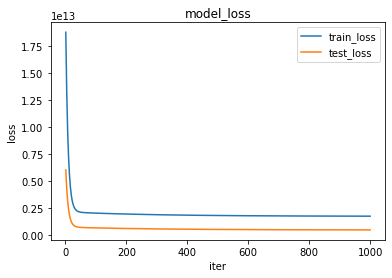

In [14]:
plt.plot(np.arange(1, slr.iter+1), slr.loss, label="train_loss")
plt.plot(np.arange(1, slr.iter+1), slr.val_loss, label="test_loss")

plt.title("model_loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()

plt.show()